In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from functions_scores import *

In [2]:
# !curl https://raw.githubusercontent.com/singhsukhendra/Breast-Cancer-Coimbra-Data-Set-/master/dataR2.csv -o cancer.csv

In [3]:
# breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv")
# Labels:
# 1=Healthy controls
# 2=Patients
breast_cancer = pd.read_csv("cancer.csv")
breast_cancer.Classification = breast_cancer.Classification.replace(['Yes', 'No'], [1, 0])
X = breast_cancer.drop(["Classification"], axis =1)
y = breast_cancer[["Classification"]].values.flatten()
dataname ='cancer'
Scaler = MinMaxScaler().fit(X)
X_sc = Scaler.transform(X)
pt_cloud = X_sc

In [4]:
# rc = gd.RipsComplex(pt_cloud, max_edge_length = maxDist(pt_cloud)/2)
# st = rc.create_simplex_tree(max_dimension = 2)
# L = st.get_filtration()
# my_data =[list(simplex) for simplex in L]

In [5]:
# Sage için gerekli bilgiler
print("Maksimum epsilon değeri:", np.round(maxDist(pt_cloud)/2,2))
print("Matris Boyutları:", pt_cloud.shape[0])

Maksimum epsilon değeri: 1.1
Matris Boyutları: 116


In [6]:
# with open("Complexes_Data/cancer_complexes.txt", "w") as file:
#     file.write(json.dumps(my_data))
# file.close()

# After Sage

In [7]:
Methods = ['single',  'average', 'complete', 'ward']
Metrics = ['braycurtis', 'cosine', 'euclidean','cityblock']
n_cluster  = len(np.unique(y))

## Homological and Minkowski Distance with p = 1/2

In [8]:
hom_distance = All2One("Matrix_Data/"+ dataname + "_result/*.npy")
minkowski = squareform(pdist(pt_cloud, minkowski_distance))

## Unsupervised Scores

In [9]:
Scores_list = [homogeneity_score, v_measure_score, adjusted_rand_score,
               adjusted_mutual_info_score, fowlkes_mallows_score, completeness_score, mutual_info_score,rand_score]
Scores_Cluster = {}
temp = []
for score in Scores_list:
    Scores_Cluster[score.__name__]= Unsupervised_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster,y,score)
    temp.append(Scores_Cluster[score.__name__])
    
Unsupervised_Scores = pd.concat(temp, axis=1)
Unsupervised_Scores.T

,braycurtis,cosine,euclidean,cityblock,minkowski,homological
homogeneity_score,0.022767,0.015087,0.022767,0.022767,0.022767,0.031314
method,average,single,average,average,average,ward
v_measure_score,0.038767,0.026782,0.038767,0.038767,0.038767,0.031776
method,average,single,average,average,average,ward
adjusted_rand_score,0.003978,0.0009,-0.001515,-0.00389,-0.005865,0.041895
method,single,complete,ward,ward,single,ward
adjusted_mutual_info_score,0.025303,0.01155,0.025303,0.025303,0.025303,0.02549
method,average,single,average,average,average,ward
fowlkes_mallows_score,0.703134,0.693542,0.693542,0.693542,0.693542,0.707848
method,single,single,single,single,single,single


In [10]:
Unsupervised_Scores.T.to_csv('Scores/'+ dataname +'/unsupervised.csv')

## Supervised Scores

In [11]:
Score_list = ['accuracy', 'f1', 'false_discovery_rate', 'false_negative_rate',
       'false_positive_rate', 'negative_predictive_value',
       'positive_predictive_value', 'precision', 'recall', 'sensitivity',
       'specificity', 'true_negative_rate', 'true_positive_rate']

Scores_Class= {}
Scores_Class_hungarian = {}
temp = []
for score in Score_list:
    Scores_Class_hungarian[score] = Supervised_Scores_hungarian(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster,y,score)
    temp.extend([Scores_Class_hungarian[score]])
Supervised_Scores = pd.concat(temp, axis =1)
Supervised_Scores.T

,braycurtis,cosine,euclidean,cityblock,minkowski,homological
hungarian_max_accuracy,0.560345,0.551724,0.543103,0.534483,0.534483,0.612069
method,single,complete,ward,single,single,ward
hungarian_max_f1,0.560345,0.551724,0.543103,0.534483,0.534483,0.612069
method,single,complete,ward,single,single,ward
hungarian_max_false_discovery_rate,0.491379,0.465517,0.474138,0.474138,0.474138,0.448276
method,ward,single,average,average,average,single
hungarian_max_false_negative_rate,0.491379,0.465517,0.474138,0.474138,0.474138,0.448276
method,ward,single,average,average,average,single
hungarian_max_false_positive_rate,0.491379,0.465517,0.474138,0.474138,0.474138,0.448276
method,ward,single,average,average,average,single


In [12]:
Supervised_Scores.T.to_csv('Scores/'+ dataname +'/supervised.csv')

# Silhouette Scores

In [13]:
Unsup_Silhoutte = Sil_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance,n_cluster, silhouette_score)
Unsup_Silhoutte

,silhouette_score,method
braycurtis,0.508845,average
cosine,0.262046,single
euclidean,0.541618,single
cityblock,0.541618,single
minkowski,0.624669,single
homological,0.302566,ward


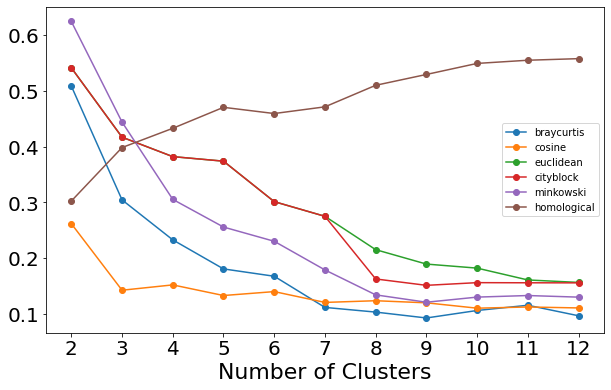

In [14]:
sil_score_plot_1(Methods, Metrics,pt_cloud, minkowski, hom_distance, np.arange(2,13), silhouette_score, dataname)

In [15]:
Unsup_Silhoutte.to_csv('Scores/'+ dataname +'/silhouette.csv')

In [16]:
Entropy(Methods, Metrics, pt_cloud, minkowski, hom_distance, n_cluster)

,single,average,complete,ward
braycurtis,0.049563,0.12005,0.40119,0.689427
cosine,0.0871,0.0871,0.368297,0.368297
euclidean,0.0871,0.12005,0.0871,0.612318
cityblock,0.0871,0.12005,0.0871,0.690767
minkowski,0.0871,0.12005,0.0871,0.690767
homological,0.0871,0.12005,0.0871,0.690767
